In [68]:
from os import path
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

target = cv2.imread("demo_source.png", cv2.IMREAD_COLOR)
source = cv2.imread("demo_target1.png", cv2.IMREAD_COLOR)
mask = cv2.imread("left_mask.png", cv2.IMREAD_GRAYSCALE)

In [51]:
import scipy.sparse

def laplacian_matrix(n, m):   
    mat_D = scipy.sparse.lil_matrix((m, m))
    mat_D.setdiag(-1, -1)
    mat_D.setdiag(4)
    mat_D.setdiag(-1, 1)
        
    mat_A = scipy.sparse.block_diag([mat_D] * n).tolil()
    
    mat_A.setdiag(-1, 1*m)
    mat_A.setdiag(-1, -1*m)
    
    return mat_A

laplacian_matrix(3, 3).todense()

matrix([[ 4., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  4., -1.,  0., -1.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  4.,  0.,  0., -1.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  4., -1.,  0., -1.,  0.,  0.],
        [ 0., -1.,  0., -1.,  4., -1.,  0., -1.,  0.],
        [ 0.,  0., -1.,  0., -1.,  4.,  0.,  0., -1.],
        [ 0.,  0.,  0., -1.,  0.,  0.,  4., -1.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  0., -1.,  4., -1.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  4.]])

In [52]:
width = target.shape[1]
height = target.shape[0]
A = laplacian_matrix(height, width)
laplacian = A.tocsc()  


for y in range(1, height - 1):
    for x in range(1, width- 1):
        if mask[y, x] == 0:
            k = x + y * width
            A[k, k] = 1
            A[k, k + 1] = 0
            A[k, k - 1] = 0
            A[k, k + width] = 0
            A[k, k - width] = 0
A = A.tocsc()


In [81]:
from scipy.sparse.linalg import spsolve

mask_flat = mask.flatten() 
result = target[:, : , ::-1].copy()
for channel in range(3):
    source_flat = source[:, :, channel].flatten()
    target_flat = target[:, :, channel].flatten()        
     
    alpha = 1
    b = laplacian.dot(source_flat)*alpha

    b[mask_flat == 0] = target_flat[mask_flat == 0]
    
    x = spsolve(A, mat_b)    
    x = x.reshape((height, width))
    result[:, :, channel] = x
   
    target[:, :, channel] = x

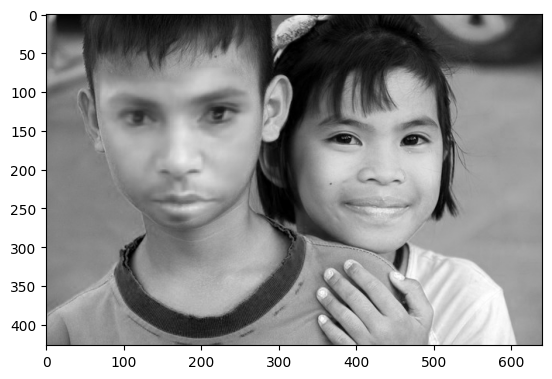

In [82]:
plt.imshow(target[:, :, ::-1])

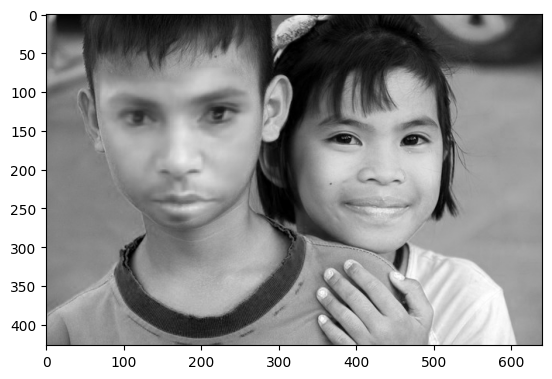

In [83]:
plt.imshow(target[:, :, ::-1])